In [1]:
import Peptide_Chef as Chef
import math
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import functools
from functools import lru_cache
from pyteomics import parser, electrochem
import re
# from Peptide_Chef import Cook_Book

In [2]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The numpy version is 1.19.1.
The pandas version is 1.0.5.
The matplotlib version is 3.2.2.
The seaborn version is 0.11.0.


# In silico Digestion 

In [6]:
%store -r net
net=list(net)

In [3]:
# use labelling format (below) to keep track of dfs.
##(*_dig= Digestion of Given Enzyme/Missed/Length/Charge)

In [7]:
url="https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000005640/UP000005640_9606.fasta.gz"

In [5]:
# Menu=Chef.CookBook(homebrew=False, takeout=True,url=url,measure=True, target="Peptide")

In [17]:
#if dataframe has been previous created, use this function. Otherwise, use CookBook function to convert Fasta to df. 
Menu=pd.read_excel(r'Human_Proteome.xlsx')

In [18]:
# Menu.to_excel('Human_Proteome.xlsx')

In [19]:
Menu.drop(Menu.columns[0], axis=1, inplace=True)


In [20]:
Menu.describe()

,Protein_Length
count,20614.000000
mean,552.845105
std,595.745883
min,2.000000
25%,245.000000
50%,410.000000
75%,666.000000
max,34350.000000


In [21]:
raw=Menu[["Peptide", "UniprotID"]].set_index("UniprotID").to_dict()["Peptide"]

## Trypsin in Silco Digestion

In [22]:
Menu=Menu.loc[Menu.UniprotID.isin(net)]
Menu.describe()

,Protein_Length
count,3319.000000
mean,580.486894
std,535.636004
min,51.000000
25%,267.500000
50%,438.000000
75%,717.000000
max,7570.000000


In [23]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="trypsin"
Tryp_Peptides=[]
for site in missed_sites:
    x=f"Tryp_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=1.55,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    Tryp_Peptides.append(globals()[str(x)])
    

You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 0-missed cleavages. 
Preparing your order...
Order is up! You have acquired 99029 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 1-missed cleavages. 
Preparing your order...
Order is up! You have acquired 279052 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 2-missed cleavages. 
Preparing your order...
Order is up! You have acquired 489236 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptide

In [24]:
Tryp_Peptides[0].sort_values("counts",ascending=True)

,O60884,gene,aa_comp,peptide,Length,z,Mass,m/z,counts
83341,NaN,P62891,"{'Q': 2, 'N': 1, 'R': 2, 'P': 2, 'I': 2, 'W': 1}",QNRPIPQWIR,10,2.686,1290.683304,480.522451,1
42200,NaN,Q59GN2,"{'Q': 2, 'N': 1, 'R': 2, 'P': 2, 'I': 2, 'W': 1}",QNRPIPQWIR,10,2.686,1290.683304,480.522451,1
20348,NaN,Q9Y5V0,"{'A': 2, 'L': 1, 'I': 1, 'Y': 1, 'T': 2, 'C': ...",AALIYTCTVCR,11,1.686,1194.588929,708.534359,2
76285,NaN,P06454,"{'M': 1, 'S': 3, 'D': 2, 'A': 2, 'V': 1, 'T': ...",MSDAAVDTSSEITTK,15,1.637,1535.713739,938.126902,2
70653,NaN,Q9Y2S6,"{'E': 3, 'M': 1, 'D': 2, 'K': 1}",EMDEEDK,7,1.626,873.365068,537.124888,2
...,...,...,...,...,...,...,...,...,...
39415,NaN,Q03001,"{'S': 3, 'D': 1, 'E': 2, 'N': 3, 'I': 1, 'L': ...",SDSENILTNYENQSR,15,1.653,1749.791795,1058.555230,440
39414,NaN,Q03001,"{'V': 3, 'N': 1, 'S': 6, 'P': 2, 'C': 1, 'L': ...",VNSSPSVCVPSLISYLTQTELADISMLR,28,1.659,3004.524936,1811.045772,440
39413,NaN,Q03001,"{'L': 1, 'A': 1, 'S': 2, 'T': 1, 'I': 2, 'D': ...",LASTISIDPK,10,1.664,1025.575711,616.331557,440
39424,NaN,Q03001,"{'F': 2, 'Q': 4, 'D': 1, 'L': 2, 'G': 3, 'I': ...",FQDQFLGIAAINISLPGEQYGQK,23,1.659,2521.237663,1519.733371,440


In [25]:
Trypsin_Missed_Count=[]
Trypsin_Missed={}
i=0
for df in Tryp_Peptides: 
    Marked = set(df.gene)
    Total= set(Menu.UniprotID)
    unique= list(Marked ^ Total)
    x=len(unique)
    Trypsin_Missed_Count.append(x)
    Trypsin_Missed[i]=unique
    i=+1
Trypsin_Missed_Count

[0, 0, 0, 0]

In [26]:
List_Trypsin_Missed=["T_Missed_0","T_Missed_1","T_Missed_2","T_Missed_3"]
Unique_2_Trypsin=[]
for key,values in Trypsin_Missed.items():
    List_Trypsin_Missed[key] = Menu[Menu['UniprotID'].isin(values)]
    List_Trypsin_Missed[key].sort_values("UniprotID").reset_index(inplace=True)
    Unique_2_Trypsin.append(List_Trypsin_Missed[key])
Unique_2_Trypsin[0].head()

,Peptide,UniprotID,Gene,Identification,Protein_Length


In [ ]:
x=Chef.ButcherShop(Unique_2_Trypsin[0],target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=-0.1,missed=0,exception=None,min_length=7,max_length=100)
x=Chef.Deli(x,meat_package=True)

In [17]:
Chef.Marinate(x,"peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True,Peptide_Inspector=False)

Marinating peptides...
IPC calculated!
Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!


,gene,aa_comp,peptide,Length,z,Mass,m/z,counts,IPC,Hydro_Sum,Neutral_Z
0,A0A0J9YWD0,"{'F': 1, 'L': 3, 'E': 1, 'W': 1, 'Y': 1}",FLEWLLY,7,0.681,963.521817,1414.863167,1,3.350361,1.214286,-1.0
1,A0A075B7B9,"{'X': 1, 'E': 1, 'Y': 2, 'C': 1, 'N': 1, 'S': ...",XEYCNSTTFYA,11,0.681,1178.470244,1730.499624,1,3.350361,-0.427273,-1.0
2,A0A0J9YXG5,"{'L': 3, 'F': 2, 'G': 2, 'S': 2, 'T': 1, 'Q': ...",LFFGSGTQLSVL,12,0.686,1250.654690,1823.111793,1,5.969619,1.216667,0.0
3,A0A0G2JLJ8,"{'V': 2, 'D': 1, 'I': 2, 'S': 1, 'T': 1}",VDIVSTI,7,0.664,727.411606,1095.499407,1,3.134209,1.771429,-1.0
4,A0A0J9YWP8,"{'S': 2, 'G': 3, 'N': 1, 'T': 2, 'I': 1, 'Y': ...",SGNTIYFGEGSWLTVV,16,0.681,1709.841314,2510.780197,1,3.350361,0.381250,-1.0
5,A0A0A0MT92,"{'S': 1, 'L': 3, 'C': 1, 'A': 1, 'V': 2, 'F': ...",SLCAVFGGGTQLTVL,15,0.686,1447.738104,2110.405399,1,5.333877,1.333333,0.0
6,A0A0J9YXN1,"{'V': 1, 'L': 4, 'W': 1, 'F': 1, 'G': 1, 'E': 1}",VLLWFGELL,9,0.681,1069.632439,1570.679059,1,3.350361,1.933333,-1.0
7,A0A0J9YVS3,"{'X': 1, 'Y': 2, 'F': 1, 'D': 1, 'W': 1, 'G': ...",XYFDYWGQGTLVTVSS,16,0.664,1704.767137,2567.420387,1,3.134209,0.043750,-1.0
8,A0A0A0MTA1,"{'V': 1, 'F': 1, 'G': 3, 'T': 1, 'Q': 1, 'L': ...",VFGGGTQLIIL,11,0.686,1099.627748,1602.955901,1,5.969619,1.654545,0.0
9,Q9NRI7,"{'C': 2, 'L': 8, 'S': 2, 'T': 1, 'V': 1, 'A': 1}",CLSLLLLSTCVALLL,15,0.686,1555.908145,2268.087675,1,5.181299,2.606667,0.0


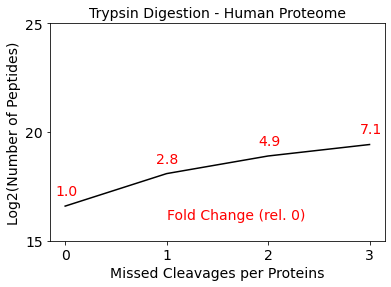

In [27]:
T_Pep_Counts=[]
#Count are in Log10
for df in Tryp_Peptides:
    log = math.log2(len(df))
    T_Pep_Counts.append(log)
plt.plot(missed_sites,T_Pep_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(np.arange(15, 26, 5),fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in T_Pep_Counts:
    ratio=2**(count-T_Pep_Counts[0])
    ratiox=float(round(ratio,1))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,T_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red",fontsize=14)
# plt.savefig("Trypsin_Silico_Peptides.eps",dpi=600)
plt.show()

The number of proteins with > 0 peptides : 20573.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 20589.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 20589.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 20590.0
Ratio of Proteins with > 0 Peptides Identified: 100.000


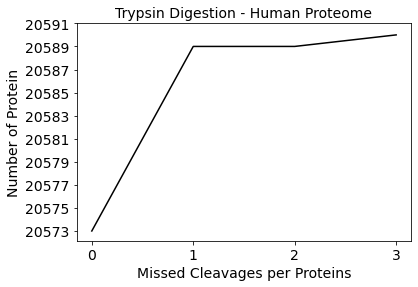

In [19]:
T_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",0)
    T_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(np.arange(T_Pro_Counts[0], T_Pro_Counts[-1]+2, 2),fontsize=14)
# plt.savefig("Trypsin_Silico_Protein_m0.eps",dpi=600,bbox_inches='tight')
plt.show()

The number of proteins with > 1 peptides : 20444.0
Ratio of Proteins with > 1 Peptides Identified: 99.373
The number of proteins with > 1 peptides : 20573.0
Ratio of Proteins with > 1 Peptides Identified: 99.922
The number of proteins with > 1 peptides : 20576.0
Ratio of Proteins with > 1 Peptides Identified: 99.937
The number of proteins with > 1 peptides : 20577.0
Ratio of Proteins with > 1 Peptides Identified: 99.937


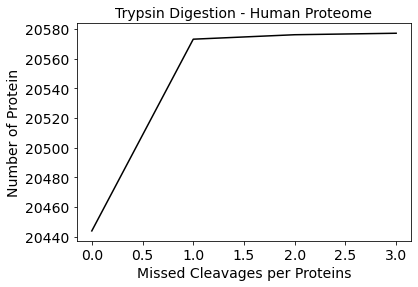

In [20]:
T_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    T_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig("Trypsin_Silico_Protein_m1.eps",dpi=600)
plt.show()

In [21]:
columns=["Tryp_0","Tryp_1","Tryp_2","Tryp_3",]
Trypsin_Coverage=[]
Tryp_Silico_Coverage=pd.DataFrame()
df=Tryp_Peptides[0]
name=f"Cov_{columns[0]}" 
globals()[str(name)]={}
for gene, protein in raw.items():
    temp=tuple(df.loc[df.gene == gene]["peptide"])
    x=Chef.Pep2Pro(protein,temp)
    globals()[str(name)][gene]=x
temp=list(globals()[str(name)].values())
Tryp_Silico_Coverage[name]= np.array(temp)
print("Done")

KeyboardInterrupt: 

In [ ]:
# i=0
# columns=["Tryp_0","Tryp_1","Tryp_2","Tryp_3",]
# Trypsin_Coverage=[]
# Tryp_Silico_Coverage=pd.DataFrame()
# for df in Tryp_Peptides:
#     name=f"Cov_{columns[i]}" 
#     globals()[str(name)]={}
#     for gene, protein in raw.items():
#         temp=tuple(df.loc[df.gene == gene]["peptide"])
#         x=Chef.Pep2Pro(protein,temp)
#         globals()[str(name)][gene]=x
#     temp=list(globals()[str(name)].values())
#     Tryp_Silico_Coverage[name]= np.array(temp)
#     i+=1
#     print("Segment Complete...")
# print("Collection Finished.")

In [22]:
Tryp_Silico_Coverage=pd.read_excel(r'Silico_Trypsin_Coverage_raw.xlsx')

In [ ]:
# Tryp_Silico_Coverage.to_excel('Silico_Trypsin_Coverage_raw.xlsx')

In [ ]:
Tryp_Silico_Coverage.head()


In [23]:
Tryp_Silico_Coverage.drop(Tryp_Silico_Coverage.columns[0], axis=1, inplace=True)

In [24]:
def Histogram(df,variables,labels,title, n_rows, n_cols):
    fig=plt.figure(figsize=(10,6),dpi=1200)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=15,ax=ax)
        ax.set_title(labels[i],fontsize=8)
#         fig.tight_layout()  # Improves appearance a bit.
        plt.yticks(np.arange(0,25000,5000),fontsize=10)
        plt.xticks(np.arange(0,1.1,0.1),fontsize=10)
        plt.ylim(0, 21000)    
#     plt.savefig(f"{title}.eps",dpi=300)
    plt.show()
    

In [25]:
labels=["Missed_0","Missed_1","Missed_2","Missed_3"]
Histogram(Tryp_Silico_Coverage,Tryp_Silico_Coverage.columns,labels,"Trypsin_Histogram",2,2)

Text(0.5, 1.0, 'Trypsin-Digested Human Proteome  Sequence Coverage')

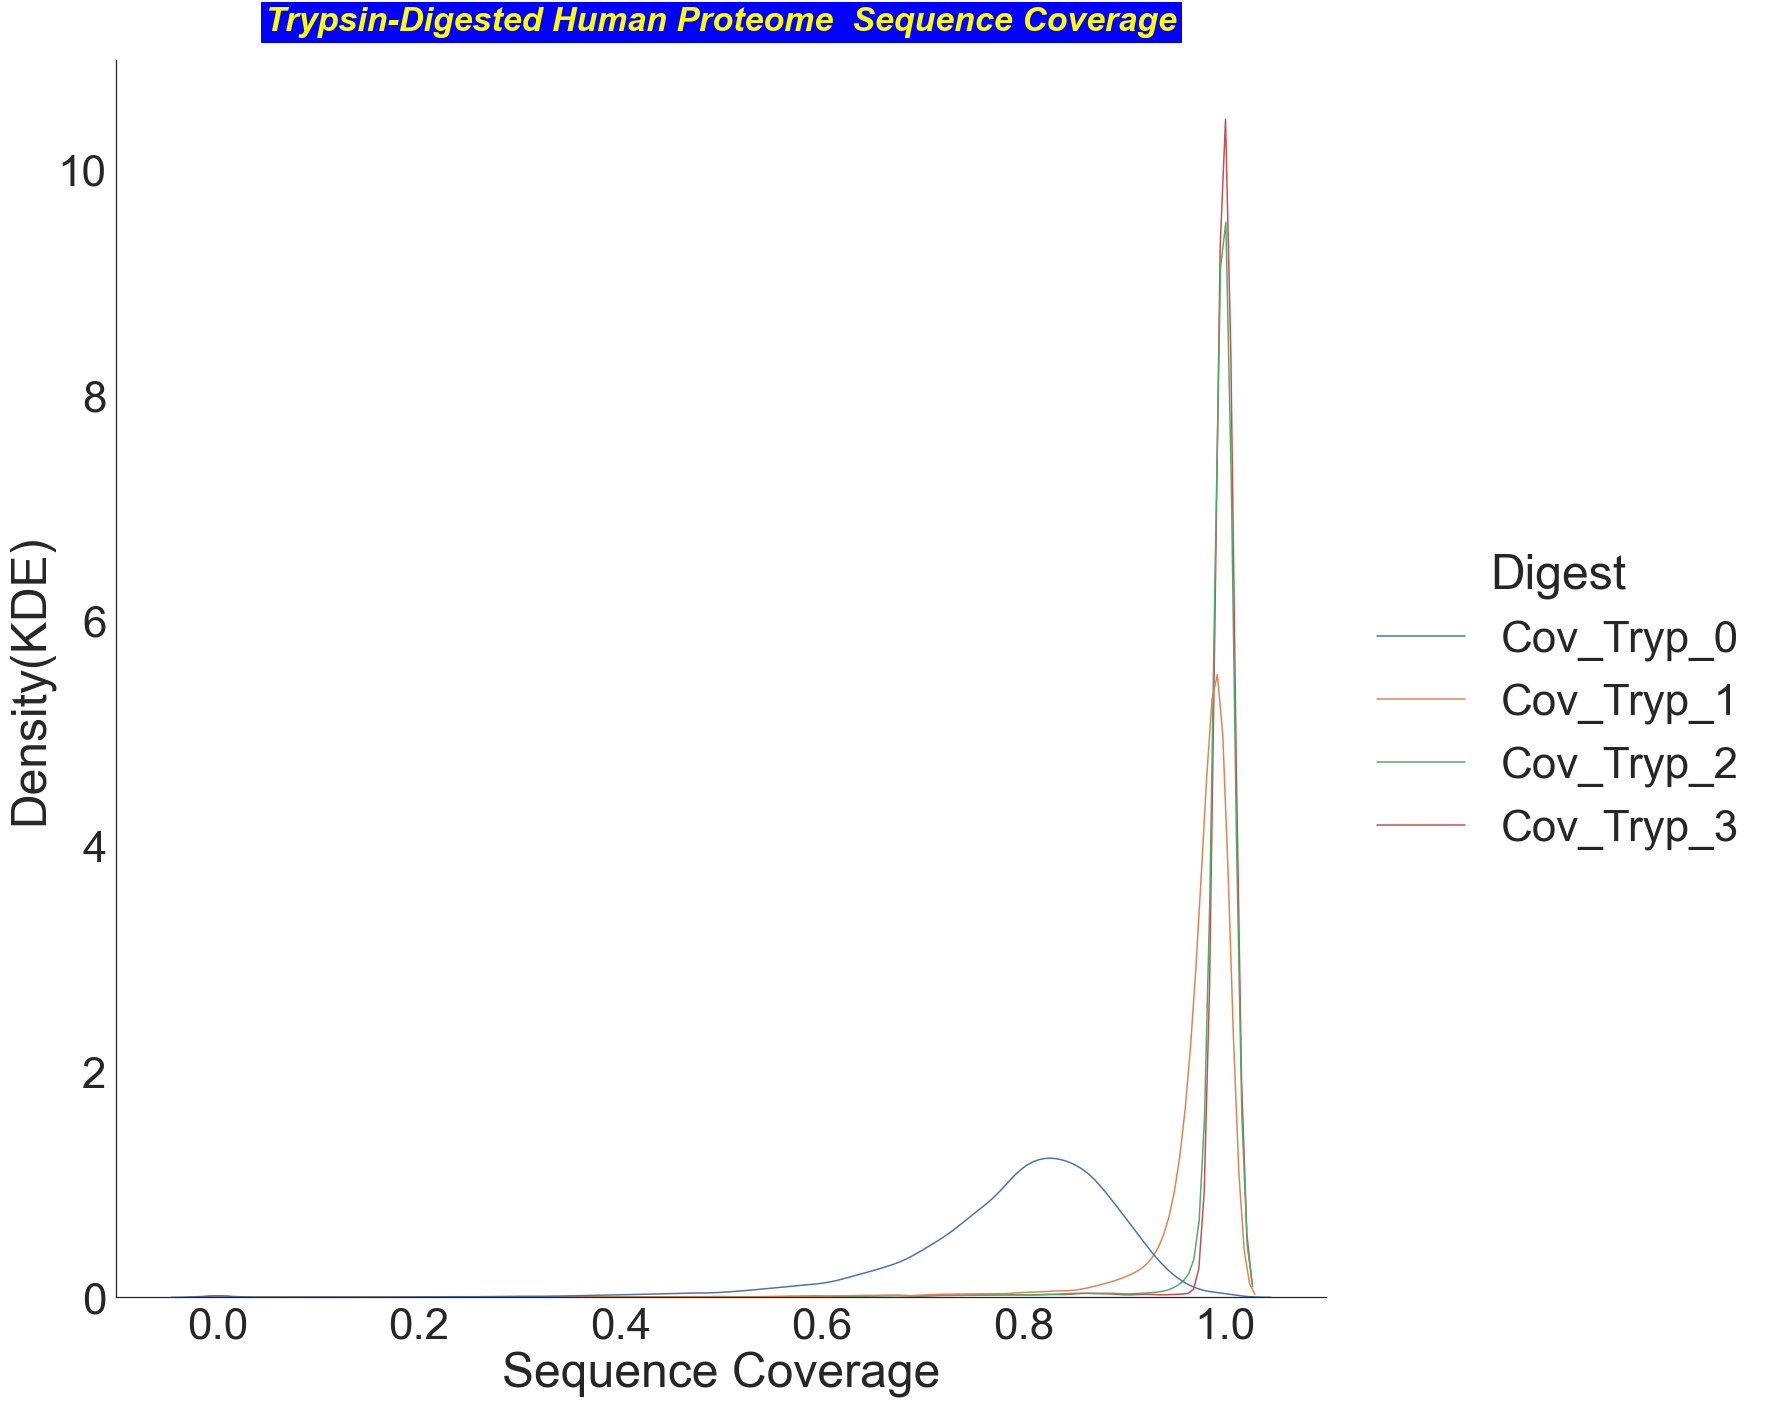

In [26]:
df1 = Tryp_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('Trypsin-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique')
# plt.savefig("Tryp_Coverage_KDE.eps",dpi=600)

## AspN in Silco Digestion

In [30]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="asp-n"
AspN_Peptides=[]
for site in missed_sites:
    x=f"AspN_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=1.55,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    AspN_Peptides.append(globals()[str(x)])
    
    

You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Generating asp-n-cut peptides based on 0-missed cleavages. 
Preparing your order...
Order is up! You have acquired 346134 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Generating asp-n-cut peptides based on 1-missed cleavages. 
Preparing your order...
Order is up! You have acquired 795307 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Generating asp-n-cut peptides based on 2-missed cleavages. 
Preparing your order...
Order is up! You have acquired 1225077 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Generating asp-n-cut peptides based on 3-m

In [31]:
AspN_Peptides[0].sort_values("counts",ascending=True)

,gene,aa_comp,peptide,Length,z,Mass,m/z,counts
0,A0A286YF01,"{'M': 1, 'G': 30, 'C': 37, 'S': 6, 'T': 4, 'R'...",MGCCGCGSCGGCGGGCGGCGGGCGGGCGGGCGSCTTCRCYRVGCCS...,96,8.686,8928.757690,1027.948157,1
329246,A0A075B711,"{'X': 1, 'N': 2, 'S': 2, 'G': 3, 'T': 2, 'P': ...",XNSGNTPLVFGKGTRLSVIA,20,2.686,1912.053046,711.858915,1
63204,Q9Y6J3,"{'M': 2, 'H': 5, 'K': 6, 'Q': 6, 'P': 20, 'L':...",MHKQPKLLPPPATPPPPPQSSSWSGNIVFTIKINIWLRVFSHSSPT...,95,12.663,10289.255061,812.544820,1
72413,Q9UI14,"{'D': 1, 'A': 4, 'E': 4, 'G': 4, 'L': 5, 'S': ...",DAEAEGLSGTTLLPKLIPSGAGREWLERRRATIRPWSTFV,40,6.642,4414.425079,664.622866,1
278313,Q8WXC6,"{'D': 1, 'L': 1, 'A': 4, 'N': 1, 'E': 1, 'K': ...",DLAANEKAVHA,11,2.659,1118.583257,420.678171,1
...,...,...,...,...,...,...,...,...
34018,Q8WZ42,"{'D': 1, 'V': 4, 'I': 3, 'E': 7, 'G': 3, 'T': ...",DVIEGTEVQFQVRAENEAGVGHPSEPTEILSIE,33,2.625,3555.807013,1354.593148,1128
34017,Q8WZ42,"{'D': 1, 'C': 1, 'N': 1, 'F': 1, 'R': 1, 'V': ...",DCNFRVT,7,1.664,835.364673,502.022039,1128
34016,Q8WZ42,"{'D': 1, 'G': 5, 'R': 4, 'P': 2, 'I': 2, 'Q': ...",DGGRPIQRYVIEKKERLGTRWVKAGKTAGP,30,8.653,3346.885075,386.788984,1128
34014,Q8WZ42,"{'D': 1, 'V': 2, 'T': 1, 'K': 1, 'R': 1, 'H': 1}",DVTKRHV,7,3.664,835.466436,228.020316,1128


In [32]:
AspN_Missed_Count=[]
AspN_Missed={}
i=0
for df in AspN_Peptides: 
    Marked = set(df.gene)
    Total= set(Menu.UniprotID)
    unique= list(Marked ^ Total)
    x=len(unique)
    AspN_Missed_Count.append(x)
    AspN_Missed[i]=unique
    i=+1
AspN_Missed_Count

[146, 141, 141, 141]

In [33]:
List_AspN_Missed=["A_Missed_0","A_Missed_1","A_Missed_2","A_Missed_3"]
Unique_2_AspN=[]
for key,values in AspN_Missed.items():
    List_AspN_Missed[key] = Menu[Menu['UniprotID'].isin(values)]
    List_AspN_Missed[key].sort_values("UniprotID").reset_index(inplace=True)
    Unique_2_AspN.append(List_AspN_Missed[key])
Unique_2_AspN[0].head()

,Peptide,UniprotID,Gene,Identification,Protein_Length
5,MPPTASLTRSPPTASQTRTLPRASRTRTPPRASLTRSPPTASLRRT...,A8MUU9,YV023,HUMAN Putative uncharacterized protein ENSP000...,505
51,METANGEEPPAGPPVSLHGRRLLRVGGACPTPLPVLQRLPPSALHH...,Q6ZSA8,YS025,HUMAN Putative uncharacterized protein FLJ4568...,131
94,MRRPSTASLTRTPSRASPTRMPSRASLKMTPFRASLTKMESTALLR...,Q9UF83,YM012,HUMAN Uncharacterized protein DKFZp434B061 OS=...,564
200,XEYCNSTTFYA,A0A075B7B9,A0A075B7B9,HUMAN Protein IGHD2OR15-2A (Fragment) OS=Homo ...,11
441,MGCCGCSGGCGSGCGGCGSGSGGCGSGCGGCGSSCCVPICCCKPVC...,Q6L8G4,KR511,HUMAN Keratin-associated protein 5-11 OS=Homo ...,156


In [34]:
x=Chef.ButcherShop(Unique_2_AspN[0],target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=-0.1,missed=0,exception=None,min_length=7,max_length=100)
x=Chef.Deli(x,meat_package=True)

You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Generating asp-n-cut peptides based on 0-missed cleavages. 
Preparing your order...
Order is up! You have acquired 55 peptides that are between 7 and 100 amino acids!


In [35]:
x.sort_values("counts", axis=0, ascending=True)

,gene,aa_comp,peptide,Length,z,Mass,m/z,counts
0,A0A075B7B9,"{'X': 1, 'E': 1, 'Y': 2, 'C': 1, 'N': 1, 'S': ...",XEYCNSTTFYA,11,0.681,1178.470244,1730.499624,1
28,Q9BYQ7,"{'M': 1, 'V': 2, 'N': 1, 'S': 3, 'C': 3, 'G': 1}",MVNSCCGSVCS,11,0.686,1070.365343,1560.299334,1
29,Q156A1,"{'M': 1, 'Q': 79}",MQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ...,80,0.686,10325.405332,15051.611271,1
30,A0A140TA64,"{'M': 1, 'V': 2, 'S': 4, 'C': 3, 'G': 1}",MVSSCCGSVCS,11,0.686,1043.354444,1520.924845,1
31,A0A1Y8EKQ5,"{'G': 2, 'Y': 2, 'S': 2, 'W': 1}",GYSSGWY,7,0.686,800.312937,1166.636934,1
32,Q9BYQ8,"{'M': 1, 'V': 2, 'S': 4, 'C': 3, 'G': 1}",MVSSCCGSVCS,11,0.686,1043.354444,1520.924845,1
33,A0A578,"{'D': 1, 'S': 3, 'A': 2, 'L': 3, 'Y': 1, 'C': 1}",DSALYLCASSL,11,0.664,1123.521952,1692.051133,1
34,P60412,"{'M': 2, 'A': 3, 'S': 5, 'T': 1, 'V': 1, 'C': ...",MAASTMSVCSSAYS,14,0.686,1376.541050,2006.619606,1
35,Q5SSG8,"{'D': 1, 'S': 6, 'T': 4, 'G': 1, 'A': 2, 'N': 1}",DSSTTSSGASTATNS,15,0.664,1354.548446,2039.982599,1
36,A0A589,"{'D': 1, 'S': 3, 'A': 2, 'L': 2, 'Y': 1, 'C': ...",DSALYLCASSQ,11,0.664,1139.480481,1716.085062,1


In [36]:
Chef.Marinate(x,"peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True,Peptide_Inspector=False)

Marinating peptides...
IPC calculated!
Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!


,gene,aa_comp,peptide,Length,z,Mass,m/z,counts,IPC,Hydro_Sum,Neutral_Z
0,A0A075B7B9,"{'X': 1, 'E': 1, 'Y': 2, 'C': 1, 'N': 1, 'S': ...",XEYCNSTTFYA,11,0.681,1178.470244,1730.499624,1,3.350361,-0.427273,-1.0
1,A0A539,"{'D': 1, 'S': 3, 'A': 2, 'L': 2, 'Y': 1, 'C': ...",DSALYLCASSQ,11,0.664,1139.480481,1716.085062,1,3.134209,0.272727,-1.0
2,P60368,"{'M': 2, 'A': 3, 'S': 5, 'T': 2, 'I': 1, 'C': ...",MAASTMSICSSACTNSWQV,19,0.686,1959.783491,2856.827246,1,5.181299,0.505263,0.0
3,Q9BQ66,"{'M': 1, 'V': 2, 'N': 1, 'S': 3, 'C': 3, 'G': 1}",MVNSCCGSVCS,11,0.686,1070.365343,1560.299334,1,5.092295,1.045455,0.0
4,P26371,"{'M': 1, 'G': 7, 'C': 6, 'S': 3}",MGCCGCSGGCGSSCGGC,17,0.686,1409.341927,2054.434296,1,4.952432,0.688235,0.0
5,Q96PG1,"{'M': 3, 'T': 4, 'Q': 2, 'G': 3, 'E': 1, 'P': ...",MTTMQGMEQTTPGAGP,16,0.681,1619.662969,2378.359720,2,3.350361,-0.637500,-1.0
6,Q96PG1,"{'D': 1, 'V': 1, 'P': 1, 'Q': 1, 'L': 1, 'G': ...",DVPQLGNI,8,0.664,837.423233,1261.179568,2,3.134209,0.000000,-1.0
7,A0A0J9YWP8,"{'S': 2, 'G': 3, 'N': 1, 'T': 2, 'I': 1, 'Y': ...",SGNTIYFGEGSWLTVV,16,0.681,1709.841314,2510.780197,1,3.350361,0.381250,-1.0
8,Q99954,"{'D': 1, 'P': 4, 'A': 2, 'L': 1, 'T': 1}",DPALPTPAP,9,0.664,859.443970,1294.343328,1,3.134209,-0.355556,-1.0
9,A0A0A0MT92,"{'S': 1, 'L': 3, 'C': 1, 'A': 1, 'V': 2, 'F': ...",SLCAVFGGGTQLTVL,15,0.686,1447.738104,2110.405399,1,5.333877,1.333333,0.0


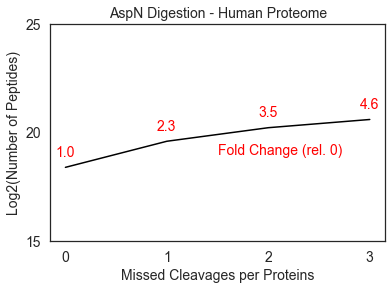

In [37]:
A_Pep_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    log = math.log2(len(df))
    A_Pep_Counts.append(log)
plt.plot(missed_sites,A_Pep_Counts,color="black")
plt.title('AspN Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(np.arange(missed_sites[0], missed_sites[-1]+1, 1),fontsize=14)
plt.yticks(np.arange(15, 26, 5),fontsize=14)
# plt.ylim([15, 25])
Ratios=[]
for count in A_Pep_Counts:
    ratio=2**(count-A_Pep_Counts[0])
    ratiox=float(round(ratio,1))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,A_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1.5,19,"Fold Change (rel. 0)",color="red",fontsize=14)
plt.savefig("AspN_Silico_Peptides.eps",dpi=600)
plt.show()

The number of proteins with > 0 peptides : 20468.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 20473.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 20473.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 20473.0
Ratio of Proteins with > 0 Peptides Identified: 100.000


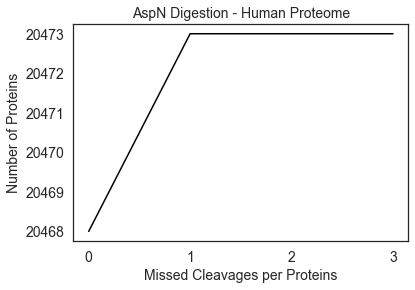

In [38]:
A_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in AspN_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",0)
    A_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,A_Pro_Counts,color="black")
plt.title('AspN Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Proteins', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(np.arange(A_Pro_Counts[0], A_Pro_Counts[-1]+1, 1),fontsize=14)
plt.savefig("AspN_Silico_Protein_m0.eps",dpi=600,bbox_inches='tight')
plt.show()

In [39]:
# i=0
# columns=["AspN_0","AspN_1","AspN_2","AspN_3",]
# AspN_Coverage=[]
# AspN_Silico_Coverage=pd.DataFrame()
# for df in AspN_Peptides:
#     name=f"Cov_{columns[i]}" 
#     globals()[str(name)]={}
#     for gene, protein in raw.items():
#         temp=tuple(df.loc[df.gene == gene]["peptide"])
#         x=Chef.Pep2Pro(protein,temp)
#         globals()[str(name)][gene]=x
#     temp=list(globals()[str(name)].values())
#     AspN_Silico_Coverage[name]= np.array(temp)
#     i+=1
#     print("Segment Complete...")
# print("Collection Finished.")

In [40]:
AspN_Silico_Coverage=pd.read_excel(r'Silico_AspN_Coverage_raw.xlsx')
AspN_Silico_Coverage.drop(AspN_Silico_Coverage.columns[0], axis=1, inplace=True)

In [41]:
# AspN_Silico_Coverage.to_excel('Silico_AspN_Coverage_raw.xlsx')

In [42]:
labels=["Missed_0","Missed_1","Missed_2","Missed_3"]
Histogram(AspN_Silico_Coverage,AspN_Silico_Coverage.columns,labels,"AspN_Histogram",2,2)

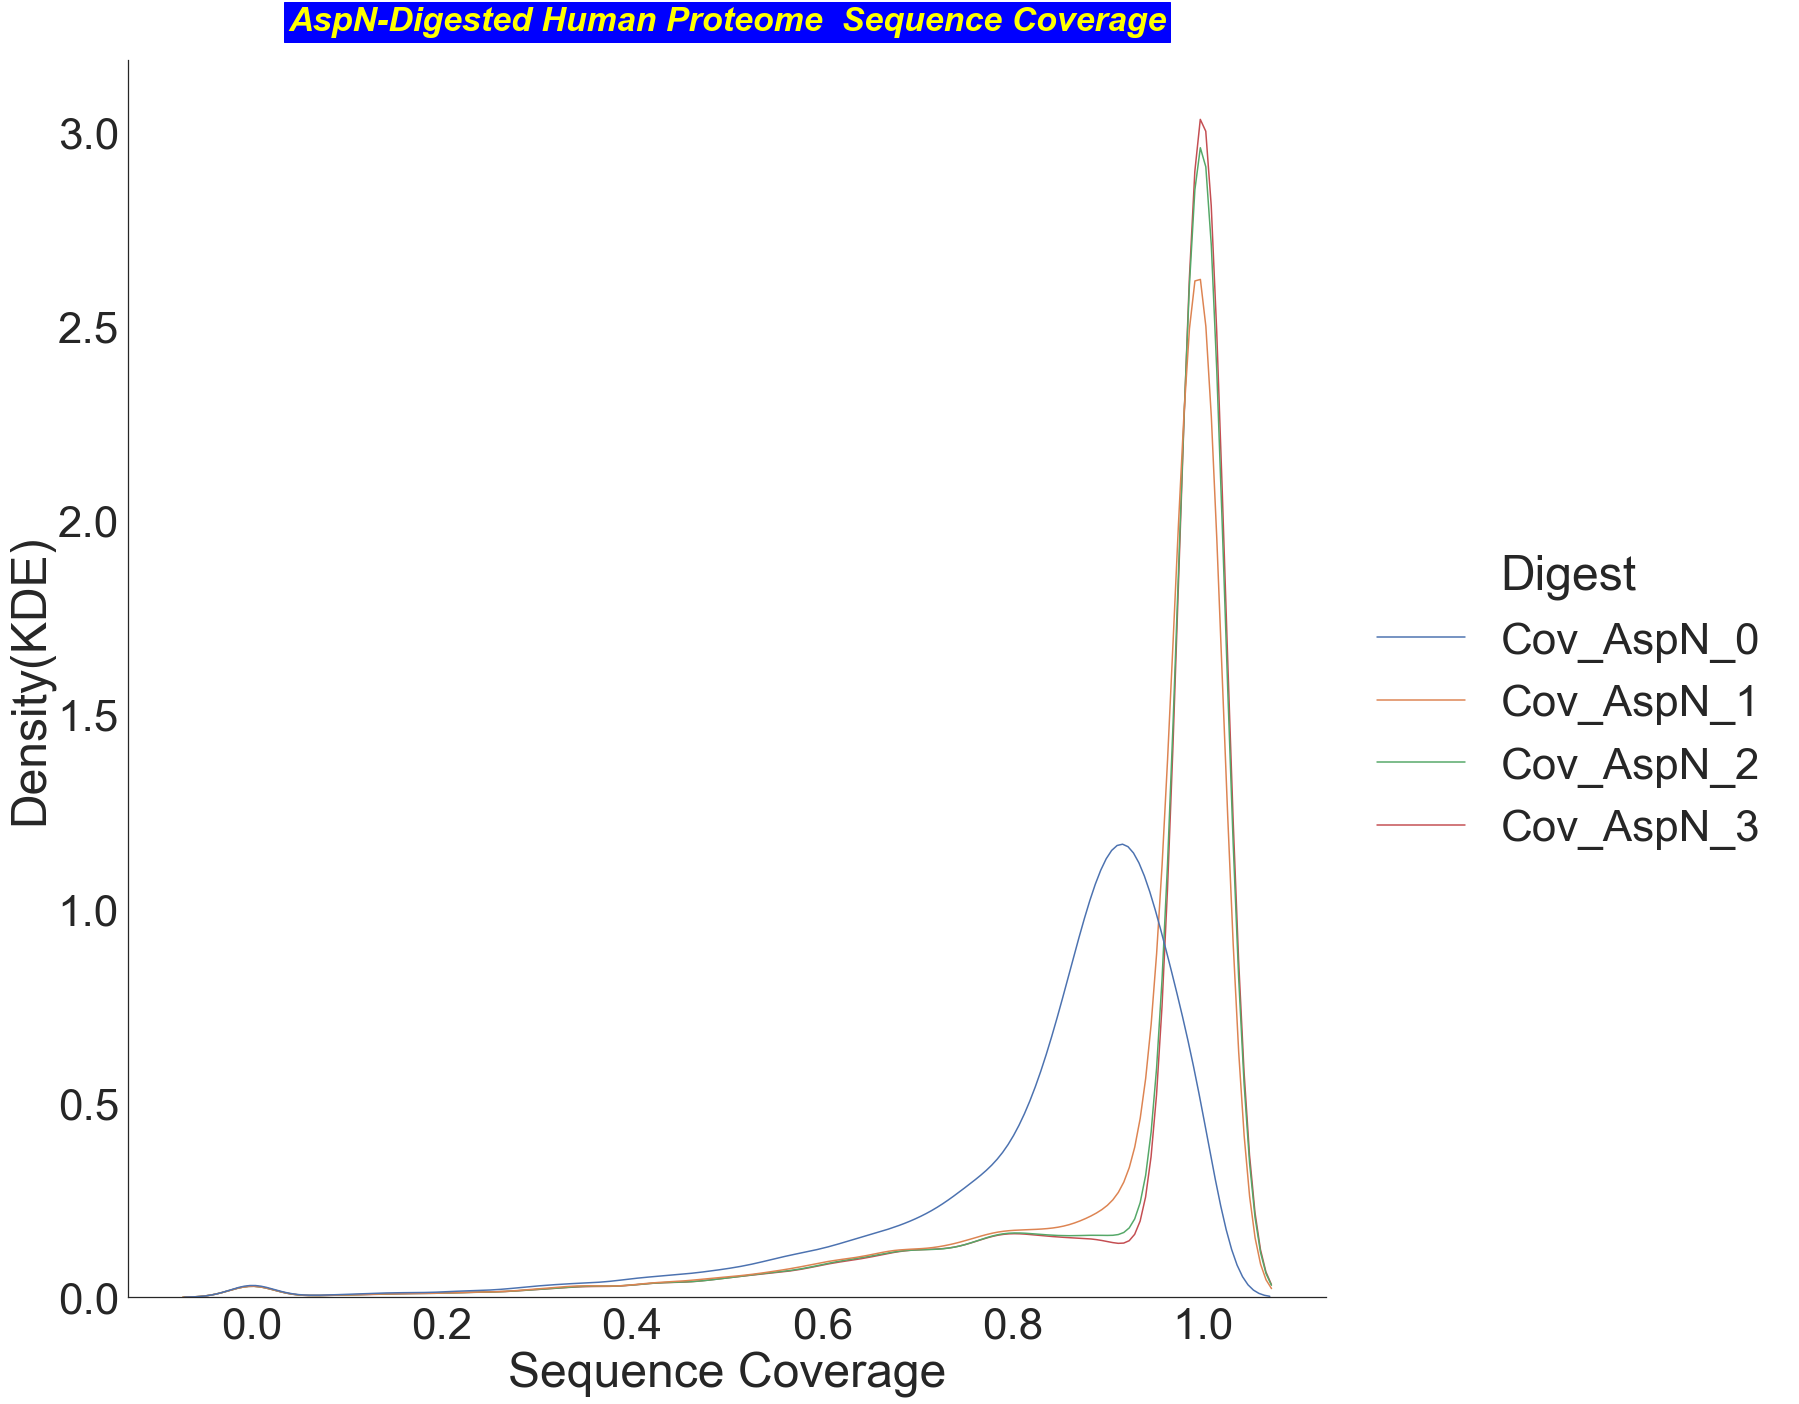

In [43]:
df1 = AspN_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('AspN-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique')
plt.savefig("AspN_Coverage_KDE.eps",dpi=600)

## GluC in Silco Digestion

In [ ]:
# GluC in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="glutamyl endopeptidase"
GluC_Peptides=[]
for site in missed_sites:
    x=f"GluC_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=1.55,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    GluC_Peptides.append(globals()[str(x)])
    
    

You order is being processed and the butcher is preparing your glutamyl endopeptidase-cut protein(s)!
The butcher is working...
Generating glutamyl endopeptidase-cut peptides based on 0-missed cleavages. 
Preparing your order...
Order is up! You have acquired 411681 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your glutamyl endopeptidase-cut protein(s)!
The butcher is working...
Generating glutamyl endopeptidase-cut peptides based on 1-missed cleavages. 
Preparing your order...
Order is up! You have acquired 1045478 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your glutamyl endopeptidase-cut protein(s)!
The butcher is working...
Generating glutamyl endopeptidase-cut peptides based on 2-missed cleavages. 


In [ ]:
GluC_Peptides[0].sort_values("counts",ascending=True)

In [ ]:
GluC_Missed_Count=[]
GluC_Missed={}
i=0
for df in GluC_Peptides: 
    Marked = set(df.gene)
    Total= set(Menu.UniprotID)
    unique= list(Marked ^ Total)
    x=len(unique)
    GluC_Missed_Count.append(x)
    GluC_Missed[i]=unique
    i=+1
GluC_Missed_Count

In [ ]:
List_GluC_Missed=["G_Missed_0","G_Missed_1","G_Missed_2","G_Missed_3"]
Unique_2_GluC=[]
for key,values in GluC_Missed.items():
    List_GluC_Missed[key] = Menu[Menu['UniprotID'].isin(values)]
    List_GluC_Missed[key].sort_values("UniprotID").reset_index(inplace=True)
    Unique_2_GluC.append(List_GluC_Missed[key])
Unique_2_GluC[0].head()

In [ ]:
x=Chef.ButcherShop(Unique_2_GluC[0],target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=-0.1,missed=0,exception=None,min_length=7,max_length=100)
x=Chef.Deli(x,meat_package=True)

In [ ]:
x.sort_values("counts", axis=0, ascending=True)

In [ ]:
Chef.Marinate(x,"peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True,Peptide_Inspector=False)

In [ ]:
G_Pep_Counts=[]
#Count are in Log10
for df in GluC_Peptides:
    log = math.log2(len(df))
    G_Pep_Counts.append(log)
plt.plot(missed_sites,G_Pep_Counts,color="black")
plt.title('GluC Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(np.arange(missed_sites[0], missed_sites[-1]+1, 1),fontsize=14)
plt.yticks(np.arange(15, 26, 5),fontsize=14)
# plt.ylim([15, 25])
Ratios=[]
for count in G_Pep_Counts:
    ratio=2**(count-G_Pep_Counts[0])
    ratiox=float(round(ratio,1))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,G_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1.5,19,"Fold Change (rel. 0)",color="red",fontsize=14)
plt.savefig("GluC_Silico_Peptides.eps",dpi=600)
plt.show()

In [ ]:
G_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in GluC_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",0)
    G_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,G_Pro_Counts,color="black")
plt.title('GluC Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Proteins', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(np.arange(G_Pro_Counts[0], G_Pro_Counts[-1]+1, 1),fontsize=14)
plt.savefig("GluC_Silico_Protein_m0.eps",dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
# i=0
# columns=["GluC_0","GluC_1","GluC_2","GluC_3",]
# GluC_Coverage=[]
# GluC_Silico_Coverage=pd.DataFrame()
# for df in GluC_Peptides:
#     name=f"Cov_{columns[i]}" 
#     globals()[str(name)]={}
#     for gene, protein in raw.items():
#         temp=tuple(df.loc[df.gene == gene]["peptide"])
#         x=Chef.Pep2Pro(protein,temp)
#         globals()[str(name)][gene]=x
#     temp=list(globals()[str(name)].values())
#     GluC_Silico_Coverage[name]= np.array(temp)
#     i+=1
#     print("Segment Complete...")
# print("Collection Finished.")

In [ ]:
GluC_Silico_Coverage=pd.read_excel(r'Silico_GluC_Coverage_raw.xlsx')
GluC_Silico_Coverage.drop(GluC_Silico_Coverage.columns[0], axis=1, inplace=True)

In [ ]:
# GluC_Silico_Coverage.to_excel('Silico_GluC_Coverage_raw.xlsx')

In [ ]:
labels=["Missed_0","Missed_1","Missed_2","Missed_3"]
Histogram(GluC_Silico_Coverage,GluC_Silico_Coverage.columns,labels,"GluC_Histogram",2,2)

In [ ]:
df1 = GluC_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('GluC-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique')
plt.savefig("GluC_Coverage_KDE.eps",dpi=600)

# Raw Experimental Data